# Motivação:
1. Entender as bibliotecas iniciais
2. Familizar-se com a sintaxe
3. Rodar um primeiro modelo para classificação de imagens
4. Teste com dados reais


# 1º exemplo de código Keras
- O bloco de construção inicial do Keras é um modelo, e o modelo mais simples é chamado de sequencial.
 - Um modelo Keras sequencial é um pipeline linear (uma pilha) de camadas de redes neurais.
  Este fragmento de código define uma única camada com 12 neurônios artificiais e espera 8 variáveis de entrada (também conhecidas como recursos):

- A ideia central da API Sequencial é simplesmente organizar as camadas do Keras em uma ordem sequencial e, portanto, é chamada de API Sequencial.

- A maior parte das RNAs em uso também possuem camadas em ordem sequencial e os dados fluem de uma camada para outra na ordem dada até que os dados finalmente cheguem à camada de saída.

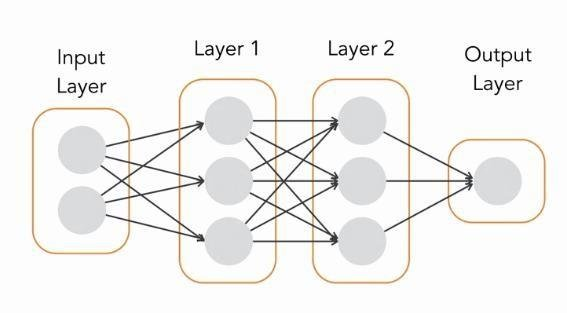

In [ ]:
!pip install keras

In [ ]:
# Importando as primeiras bibliotecas

from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.optimizers import SGD #Stocastich Gradient Descent
from tensorflow.keras.utils import to_categorical


# Para carregar as imagens
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
# Inicializando o seu primeiro código - apenas um exemplo
model = Sequential()
model.add(Dense(12, input_dim = 8, kernel_initializer = "random_uniform"))

Dense implementa a operação: output = activation(dot(input, kernel) + bias) onde ativação é a função de ativação por elemento passada como argumento de ativação, kernel é uma matriz de pesos criada pela camada e bias é um vetor de bias criado pela camada (aplicável apenas se use_bias for True). Estes são todos os atributos de Dense.

https://keras.io/api/layers/core_layers/dense/

# Um modelo para reconhecimento de dígitos

In [ ]:
# Configuração da rede e treinamento
NB_EPOCH = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 #Núremo de saídas é igual a quantidade de dígitos
OPTIMIZER = SGD() #Stocastich Gradient Descent
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 #Percentual da base reservado para o teste

## batch_size
O batch_size é o número de amostras de dados que serão propagadas através da rede neural de uma só vez. Por exemplo, se você tiver um conjunto de dados com 1000 exemplos e definir batch_size=10, a rede neural dividirá os dados em 100 lotes (batches) de 10 exemplos cada e realizará uma atualização dos pesos após cada lote.
Usar lotes menores pode ser mais eficiente em termos de uso de memória, mas pode levar a uma convergência mais lenta. Lotes maiores podem convergir mais rápido, mas podem consumir muita memória para conjuntos de dados grandes.

## epochs
As epochs definem o número de vezes que o algoritmo de treinamento percorrerá todo o conjunto de dados. Por exemplo, se você tiver 1000 exemplos e definir epochs=10, o algoritmo percorrerá os 1000 exemplos 10 vezes (uma época completa a cada iteração).

Mais épocas podem levar a um melhor ajuste dos dados, mas também aumentam o risco de overfitting (memorização dos dados em vez de generalização). Normalmente, você monitora a precisão em um conjunto de validação para decidir quando parar o treinamento.

## verbose
O verbose controla a quantidade de informações exibidas durante o treinamento da rede neural. Os valores típicos são:
0 - Silencioso, sem saída
1 - Progresso exibido com barra de progresso
2 - Uma linha por época é exibida

Definir verbose=1 ou verbose=2 pode ser útil para monitorar o progresso do treinamento.

## validation_split
O validation_split é a fração do conjunto de treinamento que será usada como conjunto de validação para monitorar o desempenho durante o treinamento. Por exemplo, se validation_split=0.2 e você tiver 1000 exemplos, 200 serão usados para validação e 800 para treinamento.

Usar um conjunto de validação separado ajuda a evitar o overfitting e fornece uma estimativa imparcial do desempenho do modelo em dados não vistos. Normalmente, você monitora a precisão de validação para decidir quando parar o treinamento e evitar o overfitting.

Em resumo, esses hiperparâmetros controlam como os dados são alimentados na rede neural durante o treinamento e quanto treinar o modelo antes de parar para evitar overfitting.

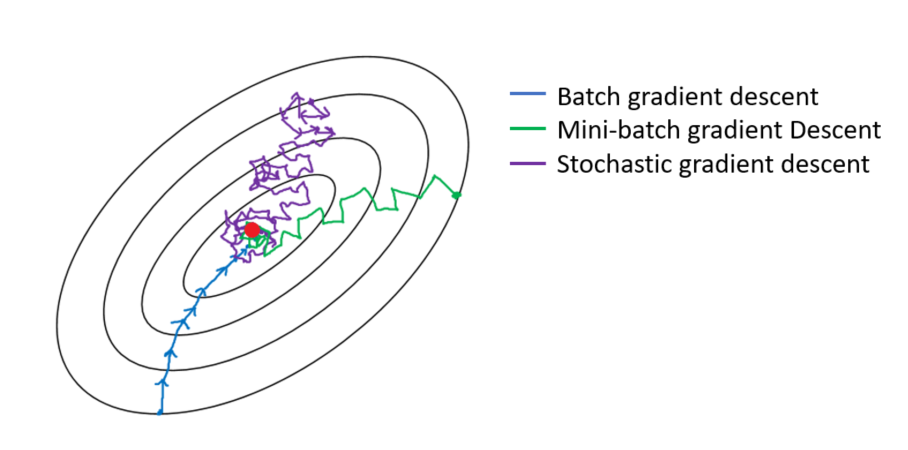

In [ ]:
# Separação entre treinamento e teste

np.random.seed(42)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print(len(X_train))
print(len(X_train[0]))

# X_train possuim 60000 linhas com 28x28 --> Precisamos então vetorizar para 60000 x 784 (28x28)
# Esse 28x28 são a quantidade de pixels da imagem...para você ter uma ideia do quanto isso pode crescer

60000
28


In [ ]:
RESHAPED = 784

X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# Normalização
# Como a escala dos dígitos vao de 0 a 255, ao dividir pelo máximo
# já estamos normalizando

X_train /= 255
X_test /= 255

print(X_train.shape[0], "tamanho do treinamento")
print(X_test.shape[0], "tamanho do teste")

#E é preciso converter de vetor para matrizes binárias - que nada mais é do que
# o nosso conhecido one hot enconding

Y_train = to_categorical(y_train, NB_CLASSES)
Y_test = to_categorical(y_test, NB_CLASSES)

60000 tamanho do treinamento
10000 tamanho do teste


As camadas de ativação em redes neurais têm um papel fundamental no controle da complexidade e da capacidade do modelo de capturar padrões não lineares nos dados. Vamos detalhar o conceito e a função dessas camadas:

## Fundamentos de Ativação
Transformação Não Linear: O propósito principal de uma camada de ativação é introduzir não-linearidade no modelo. Isso é crucial porque sem não-linearidade, uma rede neural profunda seria equivalente a um modelo linear, não importa quantas camadas intermediárias fossem adicionadas. As funções de ativação permitem que o modelo aprenda relações complexas e intrincadas nos dados, como interações entre variáveis.

## Tipos de Funções de Ativação:
ReLU (Unidade Linear Retificada): É a função de ativação mais comum em modelos de redes neurais modernos. É particularmente conhecida por acelerar a convergência do treinamento e por mitigar o problema do gradiente desaparecido em redes profundas.

Sigmóide: Transforma os valores de entrada para um intervalo entre 0 e 1, modelando probabilidades. Foi bastante utilizada em camadas de saída de classificadores binários, mas caiu em desuso em camadas ocultas devido aos gradientes que podem desaparecer.

Tangente Hiperbólica (tanh): Similar à função sigmóide, mas mapeia os valores entre -1 e 1. Também pode sofrer do problema de gradiente desaparecido.

Softmax: Utilizada principalmente na última camada de redes neurais para classificação multiclasse, convertendo os logits (valores de entrada não normalizados) em probabilidades.
Importância em Arquiteturas Específicas:

Em CNNs (Redes Neurais Convolucionais), as ativações são aplicadas após as convoluções para introduzir não-linearidade, ajudando na aprendizagem de características hierárquicas em dados visuais.

Em RNNs (Redes Neurais Recorrentes), as funções de ativação ajudam a controlar o fluxo de informações ao longo do tempo, sendo essencial para a captura de dependências temporais.

Conclusão
A escolha da função de ativação depende do tipo específico de modelo e do problema que se deseja resolver. Funções de ativação não lineares são essenciais para que as redes neurais possam realizar aprendizado de máquina complexo e profundo, permitindo a aproximação de qualquer função contínua e a captura de padrões complexos nos dados.

In [ ]:
# Definição do modelo - definição da arquitetura da rede

model = Sequential()
model.add(Dense(NB_CLASSES, input_shape = (RESHAPED,)))
model.add(Activation("softmax"))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                7850      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Uma vez definido, temos que compilá-lo para que possa ser executado pelo backend do Keras (Theano ou TensorFlow).
# Existem algumas escolhas a serem feitas durante a compilação:

model.compile(loss = "categorical_crossentropy"
                    , optimizer = OPTIMIZER
                    , metrics = ["accuracy"])

Entropia cruzada categórica (categorical_crossentropy): esta é a perda logarítmica multiclasse. Se o alvo for ti,j e a previsão for pi,j, então a entropia cruzada categórica é:

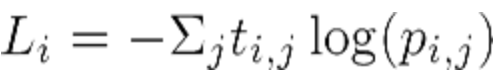

Para outras métricas: https://keras.io/metrics/

In [ ]:
# Treinamento do modelo

history = model.fit(X_train, Y_train
                    , batch_size = BATCH_SIZE, epochs = NB_EPOCH
                    , verbose = VERBOSE, validation_split = VALIDATION_SPLIT)

Epoch 1/200
375/375 [==============================] - 1s 3ms/step - loss: 1.3235 - accuracy: 0.6942 - val_loss: 0.8675 - val_accuracy: 0.8323
Epoch 2/200
375/375 [==============================] - 1s 2ms/step - loss: 0.7791 - accuracy: 0.8307 - val_loss: 0.6472 - val_accuracy: 0.8578
Epoch 3/200
375/375 [==============================] - 1s 2ms/step - loss: 0.6374 - accuracy: 0.8520 - val_loss: 0.5568 - val_accuracy: 0.8682
Epoch 4/200
375/375 [==============================] - 1s 2ms/step - loss: 0.5676 - accuracy: 0.8623 - val_loss: 0.5057 - val_accuracy: 0.8772
Epoch 5/200
375/375 [==============================] - 1s 2ms/step - loss: 0.5247 - accuracy: 0.8694 - val_loss: 0.4725 - val_accuracy: 0.8828
Epoch 6/200
375/375 [==============================] - 1s 2ms/step - loss: 0.4951 - accuracy: 0.8742 - val_loss: 0.4490 - val_accuracy: 0.8852
Epoch 7/200
375/375 [==============================] - 1s 2ms/step - loss: 0.4730 - accuracy: 0.8776 - val_loss: 0.4312 - val_accuracy: 0.8897

epochs: Este é o número de vezes que o modelo é exposto ao conjunto de treinamento. A cada iteração, o otimizador tenta ajustar os pesos para que a função objetivo seja minimizada.

batch_size: Este é o número de instâncias de treinamento observadas antes que o otimizador execute uma atualização de peso.

In [ ]:
# Avaliação dos resultados

score = model.evaluate(X_test, Y_test, verbose = VERBOSE)
print("Test score:", score[0])
print("Test accuracy:", score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.2774 - accuracy: 0.9225
Test score: 0.2774014472961426
Test accuracy: 0.9225000143051147


 - Score:  é o resultado da minimização da função de custo. É o que você tenta otimizar no treino atualizando os pesos.

- Accuracy: O número de classes classificadas corretamente. Depois de encontrar os parâmetros otimizados, você usa essas métricas para avaliar a precisão da previsão do seu modelo.

### Live test

Para desenhar as imagens em 28x28

 https://www.pixilart.com/draw/28x28-517d2f9c7af2f70

In [ ]:
# Carrega a imagem monocromatica

numero = np.array(Image.open("./content/num8.png"))
numero.shape

# Opa, não é monocromática....tem uma 3ª dimensão, porque é na verdade RGB

(28, 28, 4)

In [ ]:
# Vamos carregar novamente convertendo para grayscale
numero = np.array(Image.open("./content/num8.png").convert("1"))
numero.shape

(28, 28)

In [ ]:
# Converte a matrix para um 1D-array
numero = numero.ravel()

numero.shape

(784,)

In [ ]:
numero

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

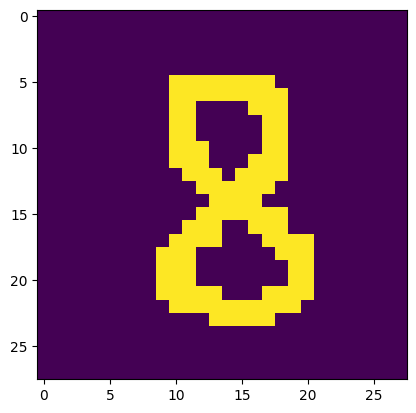

In [ ]:
numero = np.where(numero == True, 0, 1)
number_matrix = numero.reshape(28, 28)
plt.imshow(number_matrix)
plt.axis();

In [ ]:
# Vamos colocar tudo dentro de uma função
def reconhece_numero(modelo, imagem):
    numero = np.array(Image.open(imagem).convert("1"))
    numero = np.where(numero == True, 0, 1)
    numero = numero.reshape(1,-1)
    number_matrix = numero.reshape(28, 28)
    plt.imshow(number_matrix)
    plt.axis('off');
    resultado = np.round(modelo.predict(numero), 2)[0]
    print("Probabilidades:")
    print(np.vstack(resultado))
    print("Número previsto:", np.where(resultado == np.amax(resultado))[0])
    print("Numero real:")

1/1 [==============================] - 0s 46ms/step
Probabilidades:
[[0.  ]
 [0.  ]
 [0.01]
 [0.99]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]]
Número previsto: [3]
Numero real:


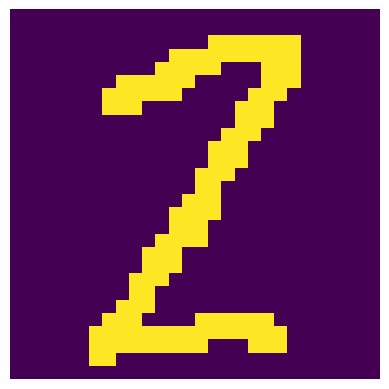

In [ ]:
# Previsão para o teste real
# Site para gerar uma nova imagem: https://www.pixilart.com/draw?gad_source=1&gclid=CjwKCAjww_iwBhApEiwAuG6ccMhNzcnshtGM9d4i0hHF6_Dgm3GYjNYVsR97eNMvSxECINf-6_1-XhoCQ5EQAvD_BwE

reconhece_numero(model,"./content/num_2.png")

Muita atenção:
- escala (onde estão os 0 ou 1)
- a acurácia tem que ser maior para aplicação real